<a href="https://colab.research.google.com/github/meetAmarAtGithub/Reva_MachineLearning/blob/main/Random_Forest_Multinomial_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="blue"><b> 1.Build a decision tree and a random forest with the Wine dataset, report your precision,recall, and plot a confusion matrix.Implement Cross validation and Hyperparameter Optimization to optimise the Decision Tree and Random Forest.</b></font>

In [ ]:
# Import the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Import SK Learn model for doing ML Modeling
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import sklearn

from sklearn.model_selection import GridSearchCV

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

wine.columns = ['Class_label', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols','Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue','OD280/OD315_of_diluted_wines', 'Proline']

In [ ]:
wine.head(5)

,Class_label,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


###  <font color="blue"><b>Exploratory Data Analysis</b></font>

In [ ]:
print ("#"*20,"\nUnique values :  \n\n", wine["Class_label"].unique())  

#################### 
Unique values :  

 [1 2 3]


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class_label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315_of_diluted_wines  178 non-null    float64
 13  Proli

In [ ]:
wine.isna().sum()

Class_label                     0
Alcohol                         0
Malic_acid                      0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
OD280/OD315_of_diluted_wines    0
Proline                         0
dtype: int64

There is no null values.

### <font color="blue">Create feature and label for classification</font>

In [ ]:
x = wine.drop(['Class_label'],axis=1, inplace=False)
y= wine['Class_label']
x.shape

(178, 13)

In [ ]:
print('\n')
y.shape

(178,)

### <font color="blue">Scling all feature data</font>

In [ ]:
from sklearn.preprocessing import scale
x_scaled = scale(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### <font color="blue">Create Train and Test Datasets</font>

In [ ]:
#Create training and test data
train_x,test_x,train_y,test_y= train_test_split(x,y,test_size=0.2,random_state=999)

In [ ]:
train_y.value_counts()

2    51
1    49
3    42
Name: Class_label, dtype: int64

In [ ]:
test_y.value_counts()

2    20
1    10
3     6
Name: Class_label, dtype: int64

## <font color="brown"><b>1. Prediction using plain Decission Tree</b></font>

In [ ]:
#Create instant of the model
myTree = tree.DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=2)

#fit the model
myTree.fit(train_x,train_y)

# Predict using the trained model
predicted = myTree.predict(test_x)
predicted

DecisionTreeClassifier(min_samples_leaf=2)

array([1, 2, 1, 1, 3, 2, 1, 2, 1, 3, 2, 2, 3, 3, 3, 2, 2, 3, 1, 2, 2, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 3])

In [ ]:
# Prediction accuracy of the model
print('Prediction Acuracy of the model is - ',metrics.accuracy_score(test_y, predicted) )

Prediction Acuracy of the model is -  0.9166666666666666


### <font color="brown">Prediction Accuracy of the model is - 91.66%</font>

In [ ]:
#Evaluate model perfomance
from sklearn import metrics
print(metrics.classification_report(test_y, predicted))

              precision    recall  f1-score   support

           1       0.83      1.00      0.91        10
           2       1.00      0.85      0.92        20
           3       0.86      1.00      0.92         6

    accuracy                           0.92        36
   macro avg       0.90      0.95      0.92        36
weighted avg       0.93      0.92      0.92        36



In [ ]:
#Confusion matrix plot using seaborn
df_confusion = metrics.confusion_matrix(test_y, predicted)
df_confusion

array([[10,  0,  0],
       [ 2, 17,  1],
       [ 0,  0,  6]])

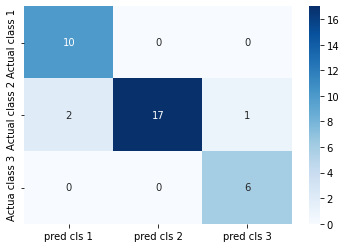

In [ ]:
sns.heatmap(df_confusion, cmap='Blues', xticklabels=['pred cls 1','pred cls 2','pred cls 3'], yticklabels=['Actual class 1','Actual class 2','Actua class 3'],annot=True, fmt='d')
plt.show()

In [ ]:
myTree.feature_importances_

array([0.02194897, 0.        , 0.        , 0.        , 0.02508454,
       0.        , 0.45905333, 0.        , 0.        , 0.07781327,
       0.        , 0.        , 0.41609989])

In [ ]:
myTree.feature_names_in_

array(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280/OD315_of_diluted_wines', 'Proline'], dtype=object)

In [ ]:
#This is another technique to get important feature details in a single statement
ft_importances_dcn = pd.Series(myTree.feature_importances_, index = x_scaled.columns).sort_values(axis=0, ascending=False)
ft_importances_dcn

Flavanoids                      0.459053
Proline                         0.416100
Color_intensity                 0.077813
Magnesium                       0.025085
Alcohol                         0.021949
Malic_acid                      0.000000
Ash                             0.000000
Alcalinity_of_ash               0.000000
Total_phenols                   0.000000
Nonflavanoid_phenols            0.000000
Proanthocyanins                 0.000000
Hue                             0.000000
OD280/OD315_of_diluted_wines    0.000000
dtype: float64

### <font color="green">2) The most important features are -<br> 1.Flavanoids - 45.91%<br>2. Proline - 41.61%<br></font>





# <font color="brown"><b>2. Hyper parameter optimization for Decission Tree and Cross Validation</b></font>

In [ ]:
my_max_depth = [2,3,4,5,6]
my_criterion = ['gini','entropy']
my_min_sample_leaf = [2,5,10,15,20]
my_min_sample_split = [2,5,10,15,20]

In [ ]:
grid = GridSearchCV(estimator=myTree, cv=10, scoring='recall', 
                    param_grid= dict(max_depth = my_max_depth, criterion= my_criterion ,
                                     min_samples_leaf = my_min_sample_leaf, min_samples_split = my_min_sample_split))

In [ ]:
grid.fit(train_x, train_y)

Streaming output truncated to the last 5000 lines.
    "choose another average setting, one of %r." % (y_type, average_options)
ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/py

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(min_samples_leaf=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [2, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='recall')

In [ ]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [ ]:
# Test model performance
predicted = grid.predict(test_x)

In [ ]:
# Prediction accuracy of the model
print('Prediction Acuracy of the model is - ',metrics.accuracy_score(test_y, predicted) )

Prediction Acuracy of the model is -  0.8055555555555556


### <font color="brown">Prediction Accuracy of the model is - 80.55%</font>

In [ ]:
#Evaluate model perfomance
from sklearn import metrics
print(metrics.classification_report(test_y, predicted))

              precision    recall  f1-score   support

           1       0.83      1.00      0.91        10
           2       1.00      0.65      0.79        20
           3       0.55      1.00      0.71         6

    accuracy                           0.81        36
   macro avg       0.79      0.88      0.80        36
weighted avg       0.88      0.81      0.81        36



In [ ]:
#Confusion matrix plot using seaborn for hyper parameter optimization model
df_confusion_hp = metrics.confusion_matrix(test_y, predicted)
df_confusion_hp

array([[10,  0,  0],
       [ 2, 13,  5],
       [ 0,  0,  6]])

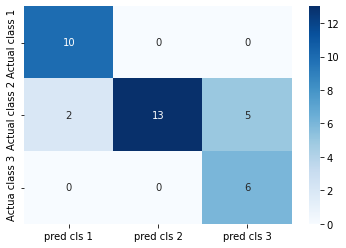

In [ ]:
sns.heatmap(df_confusion_hp, cmap='Blues', xticklabels=['pred cls 1','pred cls 2','pred cls 3'], yticklabels=['Actual class 1','Actual class 2','Actua class 3'],annot=True, fmt='d')
plt.show()

### <font color="brown">The most important features which can be deduced from the Decision Tree.</font>

In [ ]:
np.round(grid.best_estimator_.feature_importances_,2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.51, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.49])

In [ ]:
grid.best_estimator_.feature_importances_.sum()

1.0

In [ ]:
train_x.columns

Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280/OD315_of_diluted_wines', 'Proline'],
      dtype='object')

In [ ]:
#This is another technique to get important feature details in a single statement
ft_importances_tree = pd.Series(grid.best_estimator_.feature_importances_, index = x_scaled.columns).sort_values(axis=0, ascending=False)
ft_importances_tree

Flavanoids                      0.510097
Proline                         0.489903
Alcohol                         0.000000
Malic_acid                      0.000000
Ash                             0.000000
Alcalinity_of_ash               0.000000
Magnesium                       0.000000
Total_phenols                   0.000000
Nonflavanoid_phenols            0.000000
Proanthocyanins                 0.000000
Color_intensity                 0.000000
Hue                             0.000000
OD280/OD315_of_diluted_wines    0.000000
dtype: float64

### <font color="green">2) The most important features are - <br>1. Flavanoids - 51%<br>2. Proline - 49%</font>





## <font color="brown"><b>3. Prediction using Random Forest</b></font>

In [ ]:
my_estimator = [10,100,1000]
my_max_depth = [5,10,15]
my_criterion = ['gini','entropy']
my_mean_sample_leaf = [2,5,10.15]
my_mean_sample_split =[2,5,10]
scorer = sklearn.metrics.make_scorer(sklearn.metrics.recall_score, average = 'weighted')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(class_weight='balanced', random_state=23)

In [ ]:
import time

#start time
start = time.time()

#Building the model
grid_rf = GridSearchCV(estimator=forest, cv=4, scoring=scorer, 
                    param_grid= dict(max_depth = my_max_depth, criterion= my_criterion ,
                                     min_samples_leaf = my_mean_sample_leaf, min_samples_split = my_mean_sample_split, n_estimators = my_estimator))

grid_rf.fit(train_x, train_y)

end= time.time()

training_time= end-start

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
216 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/p

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=23),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [2, 5, 10.15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 100, 1000]},
             scoring=make_scorer(recall_score, average=weighted))

In [ ]:
print("Time taken to train Random Forest: ", training_time)

Time taken to train Random Forest:  248.15464735031128


In [ ]:
grid_rf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
grid_rf.best_score_

0.9861111111111112

### Using Random Forest model, Recall score is 98.61%, which is very good result.

In [ ]:
grid_rf.best_estimator_.feature_importances_
print()
x_scaled.columns

array([0.10992109, 0.03317666, 0.01378612, 0.02768258, 0.03144041,
       0.06522459, 0.17299713, 0.01260392, 0.02042427, 0.11417368,
       0.08216538, 0.1307653 , 0.18563888])

Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280/OD315_of_diluted_wines', 'Proline'],
      dtype='object')

In [ ]:
ft_importances_rf = pd.Series(grid_rf.best_estimator_.feature_importances_, index = x_scaled.columns).sort_values(axis=0, ascending=False)
ft_importances_rf

Proline                         0.185639
Flavanoids                      0.172997
OD280/OD315_of_diluted_wines    0.130765
Color_intensity                 0.114174
Alcohol                         0.109921
Hue                             0.082165
Total_phenols                   0.065225
Malic_acid                      0.033177
Magnesium                       0.031440
Alcalinity_of_ash               0.027683
Proanthocyanins                 0.020424
Ash                             0.013786
Nonflavanoid_phenols            0.012604
dtype: float64

## <font color="green">2) The most important features are -<br> 1.Proline - 18.56%<br>2.Flavanoids - 17.29%<br>3.OD280/OD315_of_diluted_wines - 13.07%<br>4.Color_intensity - 11.41%<br>5.Alcohol - 10.99%</font>





### <font color="indigo">Model Prediction - </font>

In [ ]:
predicted = grid_rf.predict(test_x)

In [ ]:
# Prediction accuracy of the model
print('Prediction Acuracy of the model is - ',metrics.accuracy_score(test_y, predicted) )

Prediction Acuracy of the model is -  0.9722222222222222


### <font color="brown">Prediction Accuracy of the model is - 97.22%</font>

In [ ]:
from sklearn import metrics
print(metrics.classification_report(test_y, predicted))

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        10
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [ ]:
df_confusion_ensemble = metrics.confusion_matrix(test_y, predicted)
df_confusion_ensemble

array([[10,  0,  0],
       [ 1, 19,  0],
       [ 0,  0,  6]])

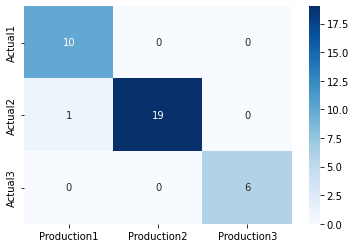

In [ ]:
sns.heatmap(df_confusion_ensemble, cmap="Blues", xticklabels=["Production1","Production2","Production3"], yticklabels=["Actual1","Actual2","Actual3"],annot=True, fmt='d')
plt.show()

# <font color="blue">3. Insights on the Decision tree and Random Forest. What are your conclusions on the same.</font>

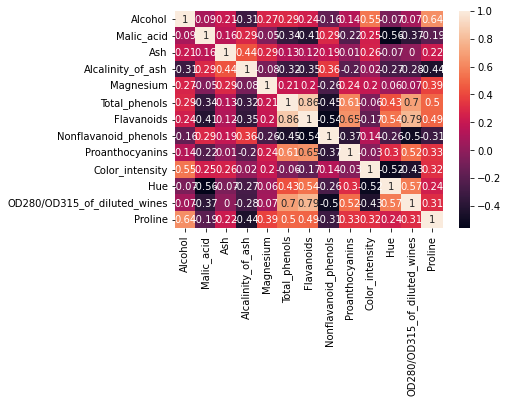

In [ ]:
sns.heatmap(np.round(x_scaled.corr(),2), annot=True)
plt.show()

### There is a lot of co-relation between independent veriables. Hence, they cannot independently predict the value of the dependent variable of class_label.<br><br>We know, Random Forest Ensemble model is free from co-linearity of data, that is why we got more important features returned by grid search cross validation. (1)Proline - 18.56%,  (2)Flavanoids - 17.29%, (3)OD280/OD315_of_diluted_wines - 13.07%, (4)Color_intensity - 11.41%, (5)Alcohol - 10.99%.<br><br>Where as, regular Decission Tree, even after Hyper parameter optimization returned only two important features of 1. Flavanoids - 51% and 2. Proline - 49%. This is because Decission Tree can not deal with co-linearity of data.

# <font color="blue">4. Do you think this is a model that you should recommend to your clients? Is there any reason to believe that?</font>

### <font color="green">(1) Random Forest model is a better model compare to Decission Tree. It is free from Co-linearity and Overfitting.<br>(2)Final model gives Recall score of 98.61%. <br>(3) Also, model prediction accuracy is prety high, 97.22%.<br>Considering, above resultsts I will recommend this model for Wine class label prediction.</font>

In [ ]:
!jupyter nbconvert --to html --template basic Random_Forest_Multinomial_Classification.ipynb

[NbConvertApp] Converting notebook Random_Forest_Multinomial_Classification.ipynb to html
[NbConvertApp] Writing 662512 bytes to Random_Forest_Multinomial_Classification.html
